## Download video

In [1]:
print('test')

test


In [3]:
# !pip install --upgrade gdown --quiet
!gdown 1QnlmTfucCOeLNNO39b_lBcT9BqmeIKGb 
!gdown 1by3qSXI1BkGu8H1R-7zXIwSOaY0S1rai

Downloading...
From: https://drive.google.com/uc?id=1QnlmTfucCOeLNNO39b_lBcT9BqmeIKGb
To: c:\AI_workshop\VIRAT_S_010204_05_000856_000890.mp4

  0%|          | 0.00/5.25M [00:00<?, ?B/s]
 10%|▉         | 524k/5.25M [00:00<00:01, 3.01MB/s]
 40%|███▉      | 2.10M/5.25M [00:00<00:00, 8.26MB/s]
100%|█████████▉| 5.24M/5.25M [00:00<00:00, 16.7MB/s]
100%|██████████| 5.25M/5.25M [00:00<00:00, 13.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1by3qSXI1BkGu8H1R-7zXIwSOaY0S1rai
To: c:\AI_workshop\IP_Camera_Daytime_Viewing_a_person_walking.mp4

  0%|          | 0.00/1.71M [00:00<?, ?B/s]
 31%|███       | 524k/1.71M [00:00<00:00, 2.98MB/s]
100%|██████████| 1.71M/1.71M [00:00<00:00, 6.86MB/s]
100%|██████████| 1.71M/1.71M [00:00<00:00, 6.13MB/s]


## 1. การติดตั้งและนำเข้าไลบรารี

ส่วนนี้เป็นการติดตั้ง YOLOv10 จาก GitHub และนำเข้าไลบรารีที่จำเป็น เช่น
* OpenCV สำหรับการประมวลผลภาพ,
* NumPy สำหรับการคำนวณ,
* Pandas สำหรับจัดการข้อมูล และ
* Matplotlib สำหรับการแสดงผลกราฟิก

In [2]:
!git clone https://github.com/THU-MIG/yolov10.git
!pip install yolov10/.

Processing c:\ai_workshop\yolov10
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl.metadata (2.7 kB)
  Using cached charset_normalizer-3.3.2-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
  Using 

In [3]:
exit()

: 

In [1]:
import cv2
import numpy as np
import pandas as pd
from ultralytics import YOLOv10
import matplotlib.pyplot as plt
# %matplotlib inline

c:\AI_workshop\AI\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. การโหลดโมเดล YOLOv10
ดาวน์โหลดไฟล์โมเดล YOLOv10 ที่ผ่านการเทรนมาแล้ว และโหลดเข้าสู่หน่วยความจำเพื่อใช้งาน

In [11]:
!wget https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
model = YOLOv10('yolov10s.pt')


In [17]:
!mkdir frames

A subdirectory or file frames already exists.


## การอ่านวิดีโอและประมวลผลเฟรม
ส่วนนี้เป็นการอ่านไฟล์วิดีโอ จากนั้นอ่านเฟรมแรกและเฟรมที่ 4 ของวิดีโอ และแปลงสีจาก BGR เป็น RGB

In [4]:
cap = cv2.VideoCapture('IP_Camera_Daytime_Viewing_a_person_walking.mp4')

ret, frame1 = cap.read()
frame1=cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

success = cap.grab()
success = cap.grab()
success = cap.grab()
ret, frame4 = cap.retrieve()
frame4=cv2.cvtColor(frame4, cv2.COLOR_BGR2RGB)
cap.release()

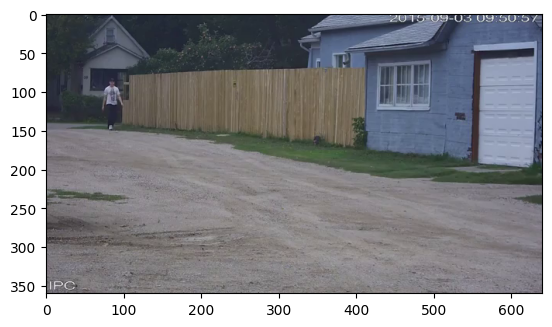

In [5]:
plt.imshow(frame1)
plt.show()

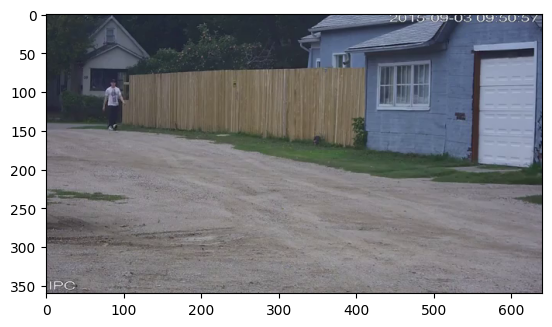

In [6]:
plt.imshow(frame4)
plt.show()

## 4. ทดสอบการตรวจจับวัตถุ
ใช้โมเดล YOLOv10 ที่โหลดมาเพื่อตรวจจับวัตถุในเฟรมที่ 1 และ 4 จากนั้นดึงข้อมูลคลาสและพิกัดกล่องขอบเขต (bounding boxes) ของวัตถุที่ตรวจพบ

In [9]:
model.fuse()

In [10]:
results1 = model.predict(frame1)
results4 = model.predict(frame4)


Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.4.1+cpu CPU (Intel Core(TM) i7-8700 3.20GHz)
YOLOv10s summary (fused): 293 layers, 8096880 parameters, 86880 gradients, 24.8 GFLOPs
0: 384x640 1 person, 174.0ms
Speed: 4.0ms preprocess, 174.0ms inference, 11.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 181.0ms
Speed: 2.0ms preprocess, 181.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


In [11]:
results1[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8799])
data: tensor([[ 72.0564,  84.9320,  99.5244, 151.2841,   0.8799,   0.0000]])
id: None
is_track: False
orig_shape: (360, 640)
shape: torch.Size([1, 6])
xywh: tensor([[ 85.7904, 118.1081,  27.4680,  66.3521]])
xywhn: tensor([[0.1340, 0.3281, 0.0429, 0.1843]])
xyxy: tensor([[ 72.0564,  84.9320,  99.5244, 151.2841]])
xyxyn: tensor([[0.1126, 0.2359, 0.1555, 0.4202]])

In [13]:
cls=results1[0].boxes.cls.cpu().numpy()
cls

array([          0], dtype=float32)

In [14]:
boxes1=results1[0].boxes.xyxy.cpu().numpy()
boxes1[cls==0]

array([[     72.056,      84.932,      99.524,      151.28]], dtype=float32)

In [15]:
boxes4=results4[0].boxes.xyxy.cpu().numpy()
boxes4[cls==0]

array([[     73.414,      85.326,      100.45,      151.44]], dtype=float32)

In [16]:
xyxy=results1[0].boxes.xyxy.cpu().numpy()[cls==0]
xyxy

array([[     72.056,      84.932,      99.524,      151.28]], dtype=float32)

In [17]:
frame_count=0
insert_index = 0
frame_xyxy = np.insert(xyxy, insert_index, frame_count, axis=1)
frame_xyxy

array([[          0,      72.056,      84.932,      99.524,      151.28]], dtype=float32)

In [18]:
# prompt: append to empty numpy array rows

import numpy as np

# Create an empty numpy array
empty_array = np.empty((0, 5))  # Assuming 5 columns based on your example

# Example rows to append
row1 = np.array([1, 2, 3, 4, 5])
row2 = np.array([6, 7, 8, 9, 10])

# Append rows to the empty array
updated_array = np.append(empty_array, np.array([row1]), axis=0)
updated_array = np.append(updated_array, np.array([row2]), axis=0)

print(updated_array)


[[          1           2           3           4           5]
 [          6           7           8           9          10]]


## 5. การประมวลผลข้อมูลตำแหน่งวัตถุ
วนลูปผ่านทุกเฟรมของวิดีโอ ตรวจจับคน (class 0) ในแต่ละเฟรม และบันทึกตำแหน่งของคนพร้อมกับหมายเลขเฟรม

In [19]:
cap = cv2.VideoCapture('C:\AI_workshop\IP_Camera_Daytime_Viewing_a_person_walking.mp4')

person = []
insert_index = 0
frame_count=0

ret, frame = cap.read()
while ret:
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = model.predict(frame, verbose=False,classes=[0])
    cls=results[0].boxes.cls.cpu().numpy()
    xyxy=results[0].boxes.xyxy.cpu().numpy()[cls==0]
    frame_xyxy = np.insert(xyxy, insert_index, frame_count, axis=1)
    person.append(frame_xyxy[0])

    #read next frame
    ret, frame = cap.read()
    frame_count+=1

cap.release()

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\computer\AppData\Local\Temp\ipykernel_1616\580493560.py:1: SyntaxWarning: invalid escape sequence '\A'
  cap = cv2.VideoCapture('C:\AI_workshop\IP_Camera_Daytime_Viewing_a_person_walking.mp4')


## 6. การสร้าง DataFrame:

In [20]:
columns = ['frame', 'x1', 'y1', 'x2', 'y2']
df = pd.DataFrame(person,columns=columns)
df

,frame,x1,y1,x2,y2
0,0.0,72.056412,84.931999,99.524384,151.284119
1,1.0,72.637787,84.578659,99.798737,151.725113
2,2.0,73.059189,85.245979,100.758194,151.412659
3,3.0,73.414322,85.325974,100.453049,151.437881
4,4.0,73.654022,85.802010,101.472076,151.307800
...,...,...,...,...,...
955,955.0,123.461372,36.533203,259.608032,351.691193
956,956.0,121.622131,34.453735,251.559143,351.874756
957,957.0,120.767273,31.413361,241.789764,351.869720
958,958.0,120.050880,28.835205,232.449982,351.881470


# multiple object

In [37]:
cap = cv2.VideoCapture('VIRAT_S_010204_05_000856_000890.mp4')

ret, frame1 = cap.read()
frame1=cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

success = cap.grab()
success = cap.grab()
success = cap.grab()
ret, frame4 = cap.retrieve()
frame4=cv2.cvtColor(frame4, cv2.COLOR_BGR2RGB)
cap.release()

In [38]:
results1 = model.predict(frame1)
results4 = model.predict(frame4)

In [39]:
cls=results1[0].boxes.cls.cpu().numpy()
cls

array([          0,           0,           0,           0,           0,           0,           0], dtype=float32)

In [40]:
boxes1=results1[0].boxes.xyxy.cpu().numpy()
boxes1[cls==0]

array([[     882.26,      463.58,      940.52,      625.17],
       [     818.17,      452.27,      870.85,      614.76],
       [     970.58,      448.21,      1043.5,      618.28],
       [     738.42,      482.82,      811.43,      662.03],
       [     365.63,       275.4,      386.43,      333.75],
       [     519.25,      330.89,      544.49,      413.22],
       [     391.87,      267.78,      416.54,      334.34]], dtype=float32)

In [41]:
cls=results4[0].boxes.cls.cpu().numpy()
cls

boxes4=results4[0].boxes.xyxy.cpu().numpy()
boxes4[cls==0]

array([[      749.9,      492.31,      832.65,      674.39],
       [     877.42,      462.41,      935.25,      625.08],
       [     963.16,      443.04,      1041.7,      616.13],
       [     811.61,      448.89,      865.28,      614.39],
       [     366.61,      273.37,      388.06,       333.3],
       [     394.17,      268.72,      417.76,      334.24],
       [     515.29,      322.87,      542.07,      410.66]], dtype=float32)

In [27]:
frame1.shape

(720, 1280, 3)

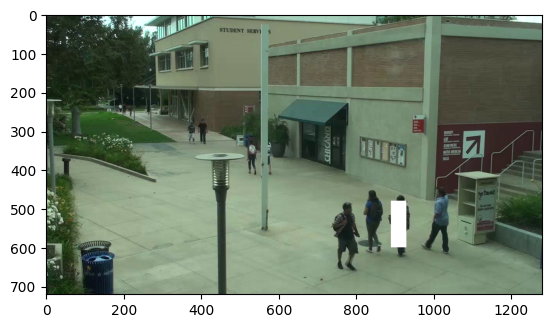

In [42]:
frame1[480:600, 890:930, :] = 255
plt.imshow(frame1)
plt.show()

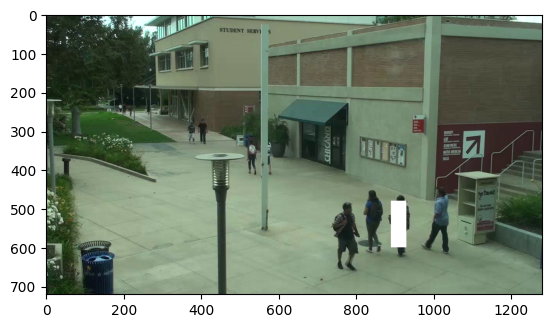

In [43]:
frame4[500:650, 750:820, :] = 255
plt.imshow(frame1)
plt.show()

## การคำนวณระยะห่างระหว่างวัตถุที่อยู่ต่างเฟรม
ส่วนนี้คำนวณระยะห่างแบบยุคลิด (Euclidean distance) ระหว่างกล่องขอบเขตในเฟรมที่ 1 และเฟรมที่ 4 เพื่อดูว่าวัตถุเคลื่อนที่ไปมากน้อยเพียงใด

In [46]:
from sklearn.metrics.pairwise import euclidean_distances

In [47]:
distances = euclidean_distances(boxes1,boxes4)
distances

array([[     180.01,      7.2479,      131.51,       104.8,      832.15,      796.32,      599.37],
       [     106.21,      88.701,      224.31,      9.2471,      740.41,       705.3,      508.16],
       [     313.42,      143.65,      9.4503,      238.82,       951.9,      914.68,      719.37],
       [     28.729,      190.88,      327.48,      108.07,      685.14,      653.27,      459.46],
       [     714.05,      826.43,      945.69,      732.84,      2.8152,      42.909,      234.08],
       [     480.11,       585.8,      705.74,      492.72,      239.72,      204.47,      9.6127],
       [     683.65,      791.98,       909.6,      699.13,       38.49,      2.7699,      199.63]], dtype=float32)

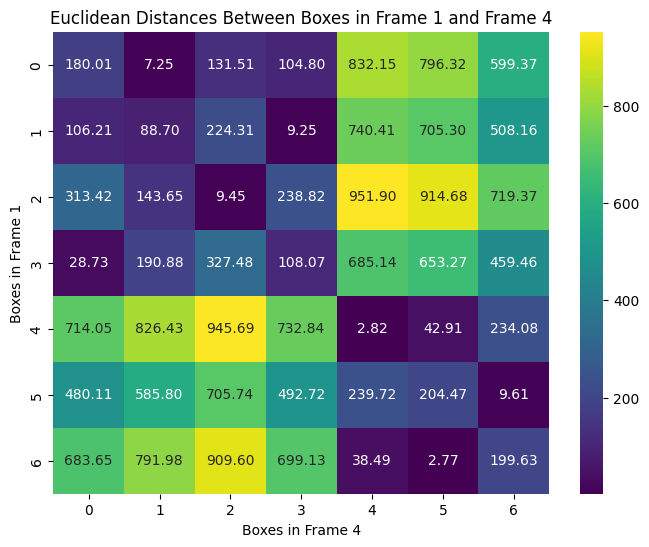

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(distances, annot=True, cmap='viridis', fmt=".2f")
plt.xlabel('Boxes in Frame 4')
plt.ylabel('Boxes in Frame 1')
plt.title('Euclidean Distances Between Boxes in Frame 1 and Frame 4')
plt.show()

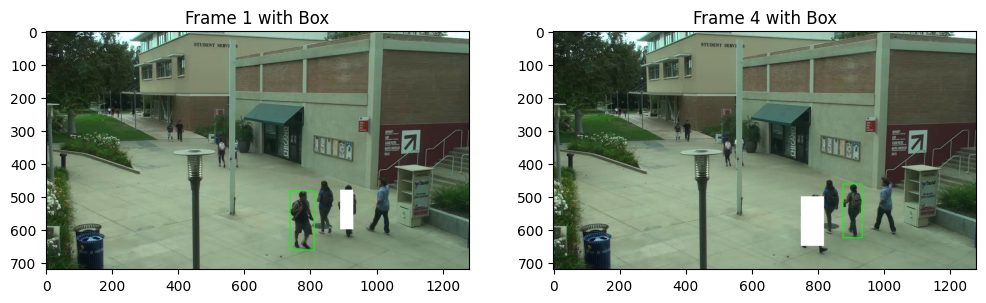

In [51]:
# prompt: draw rectangle box of boxes1[0,:] in the frame1 and draw rectangle box of boxes4[1,:] in the frame4, then show

import matplotlib.pyplot as plt
# Draw rectangle box for boxes1[0,:] in frame1
x1, y1, x2, y2 = boxes1[3,:].astype(int)
cv2.rectangle(frame1, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Draw rectangle box for boxes4[1,:] in frame4
x1, y1, x2, y2 = boxes4[1,:].astype(int)
cv2.rectangle(frame4, (x1, y1), (x2, y2), (0, 255, 0), 2)


# Show the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(frame1)
plt.title('Frame 1 with Box')

plt.subplot(1, 2, 2)
plt.imshow(frame4)
plt.title('Frame 4 with Box')

plt.show()


In [52]:
results = model.predict(frame4)

detections_xyxy = np.hstack((
        results[0].boxes.xyxy.cpu().numpy(),
        results[0].boxes.conf.cpu().numpy()[:, np.newaxis]
    ))

In [53]:
detections_xyxy

array([[     962.54,      443.72,      1041.8,      616.18,     0.89538],
       [     878.28,      463.26,      933.76,      622.84,     0.87931],
       [     815.94,      449.34,      865.03,      613.82,     0.86693],
       [      366.6,      273.41,      388.06,      333.26,     0.81798],
       [     394.19,      268.79,      417.78,      334.21,     0.74948],
       [      515.3,       323.1,      542.08,      410.63,     0.70375]], dtype=float32)